In [1]:
from pathlib import Path


import torch
from torch.utils.data import DataLoader
from visualizations import sample
from dataset import get_dataset
from models import VAE
from seed import get_seeded_generator, seeded_worker_init_fn, seed_everything
import yaml

In [2]:
config = f"configs/VAE/CelebA/baseline.yaml"
ckpt = f"checkpoints/CelebA/VAE/best.ckpt"
device = torch.device("mps")

In [3]:
with open(config, "r") as fs:
    config = yaml.safe_load(fs)

seed_everything(config["training"]["seed"])

model = VAE(
    image_channels=config["image"]["channels"],
    image_size=(
        config["image"]["size"],
        config["image"]["size"]
    ),
    **config["model"]
)
model.load_state_dict(
    torch.load(ckpt, map_location=device)["model_state_dict"]
)
model = model.to(device)

In [4]:
train_dataset, test_dataset = get_dataset(
    config["dataset"]["name"],
    Path(config["dataset"]["datasets_dir"]),
    config["image"]["size"]
)

train_dataloader = DataLoader(
    train_dataset,
    batch_size=config["training"]["batch_size"],
    worker_init_fn=seeded_worker_init_fn,
    generator=get_seeded_generator(config["training"]["seed"]),
    shuffle=True,
    pin_memory=config["training"]["pin_memory"],
    num_workers=config["training"]["num_workers"],
    prefetch_factor=(
        config["training"]["prefetch_factor"] if config["training"]["prefetch_factor"] else None
    ),
)
test_dataloader = DataLoader(
    test_dataset,
    batch_size=config["training"]["batch_size"],
    worker_init_fn=seeded_worker_init_fn,
    generator=get_seeded_generator(config["training"]["seed"]),
    num_workers=config["training"]["num_workers"],
    prefetch_factor=(
        config["training"]["prefetch_factor"] if config["training"]["prefetch_factor"] else None
    ),
)

Files already downloaded and verified
Files already downloaded and verified


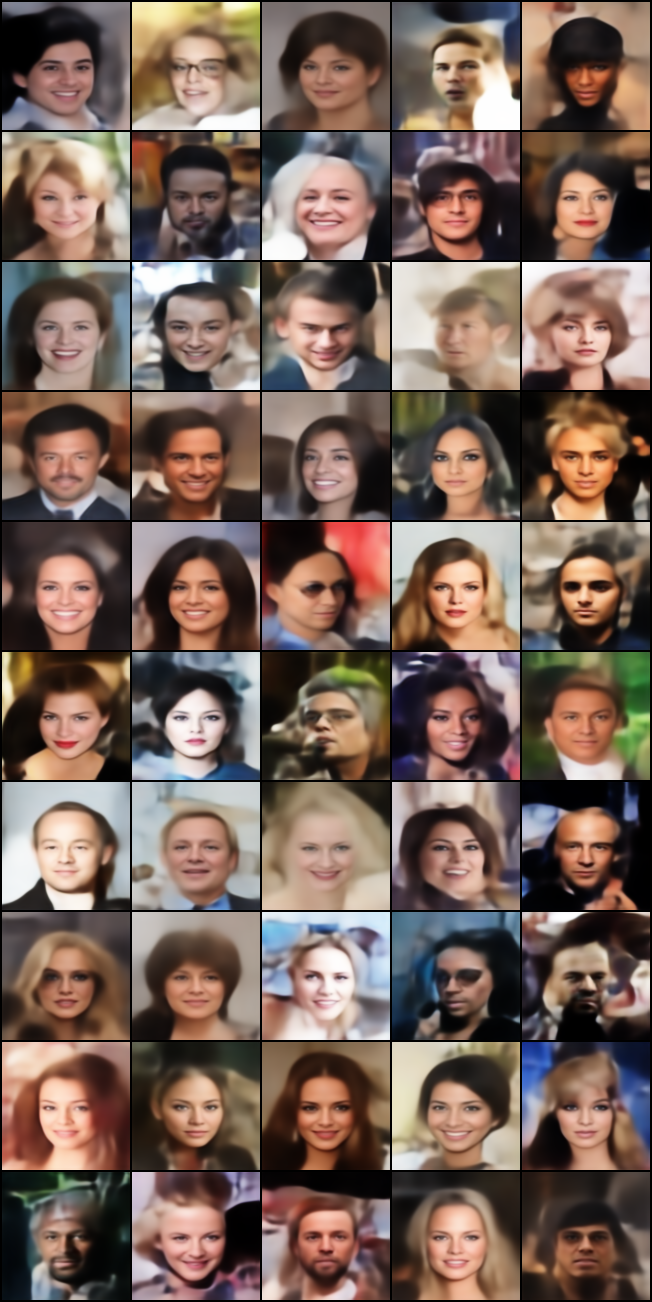

In [5]:
sample(model, 50, device)

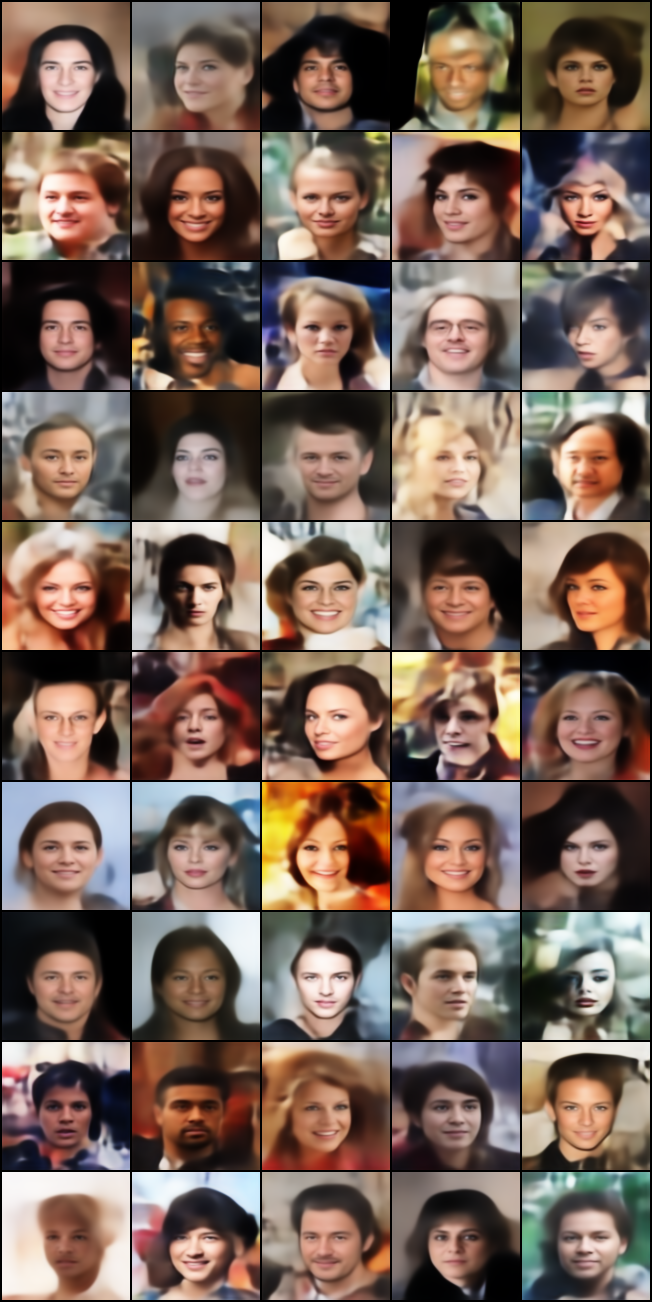

In [6]:
sample(model, 50, device)

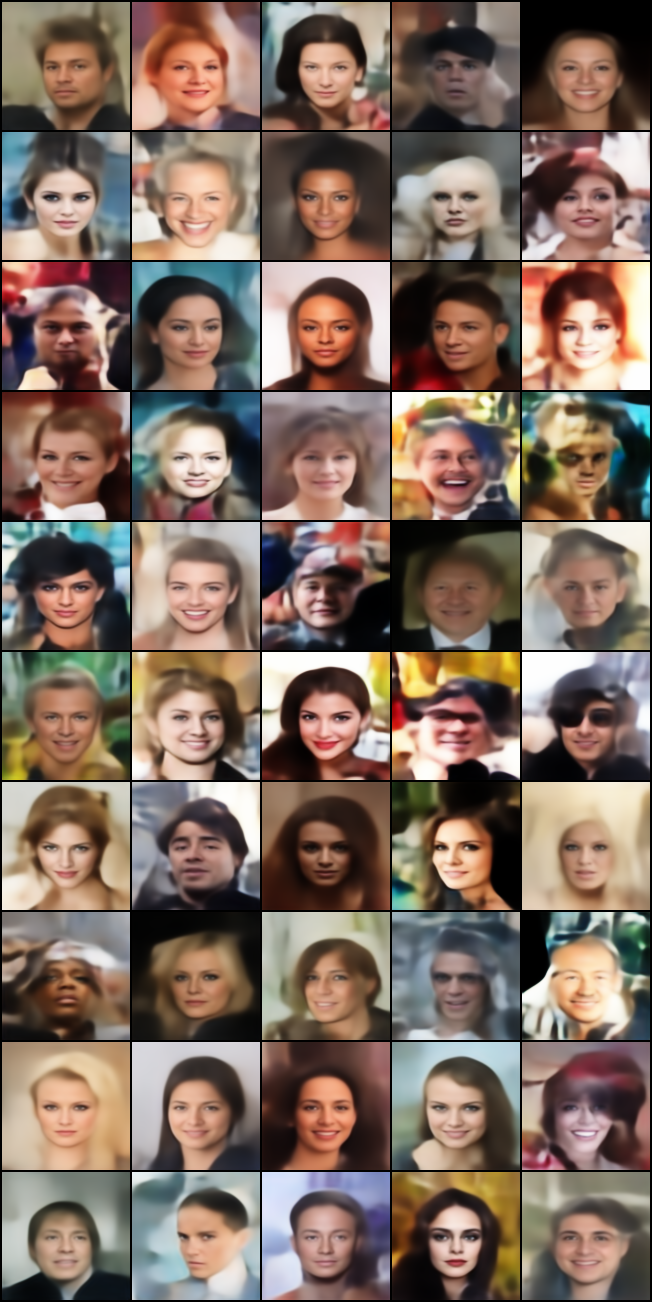

In [7]:
sample(model, 50, device)